## Quick and dirty compare

Sometimes all your need is a simple comparison of two time series. The `modelskill.match()` method does just that.

In [1]:
import mikeio 
import modelskill as ms

### The model
Can be either a dfs0 or a DataFrame. 

In [2]:
fn_mod = '../tests/testdata/SW/ts_storm_4.dfs0'
df_mod = mikeio.read(fn_mod, items=0).to_dataframe()  # select 1 item

### The observation
Can be either a dfs0, a DataFrame or a PointObservation object. 

In [3]:
fn_obs = '../tests/testdata/SW/eur_Hm0.dfs0'

### match()

The match() method will return an object that can be used for scatter plots, skill assessment, time series plots etc.

If the observation or model has more than 1 item, the `obs_item` or `mod_item` can be given to specify the relevant item. 

In [4]:
cmp = ms.match(fn_obs, df_mod)   # both with 1 item only

C:\Working\Coding\Repos\modelskill\modelskill\obs.py:79: UserWarning: Could not guess geometry type from data or args, assuming POINT geometry. Use PointObservation or TrackObservation to be explicit.
  warnings.warn(


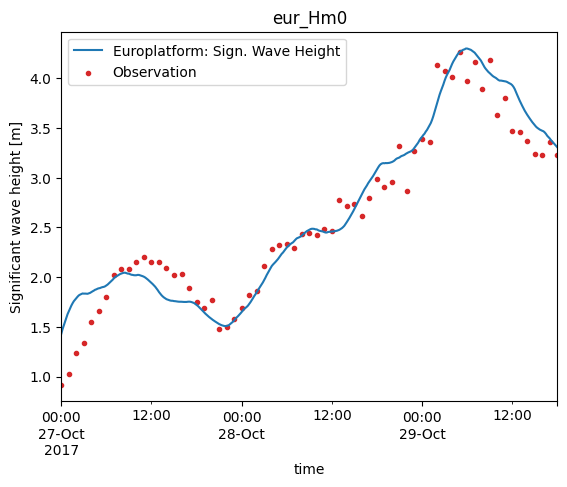

In [5]:
cmp.plot.timeseries();

In [6]:
cmp.skill()

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
eur_Hm0,67,0.052239,0.22824,0.222181,0.174851,0.968321,0.085898,0.929767


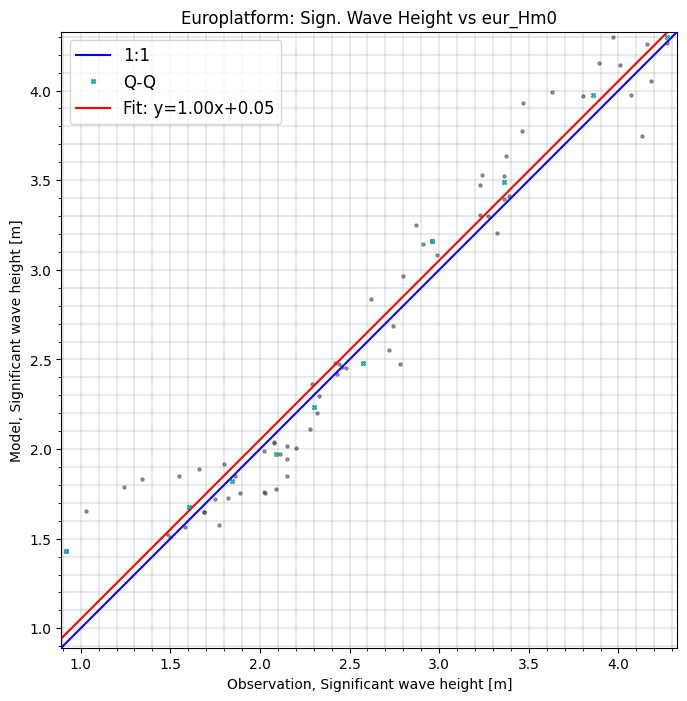

In [7]:
cmp.plot.scatter();

By default the regression line is fitted based on all the data.
In order to fit do a weighted regression based on the quantiles, use the `fit_to_quantiles` option.

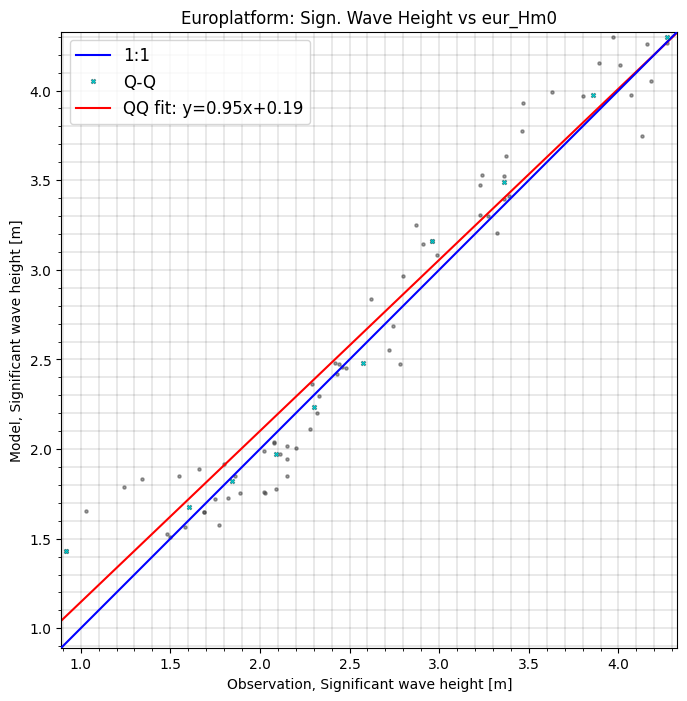

In [8]:
cmp.plot.scatter(fit_to_quantiles=True);

An example including the background data and skill table using the `show_points` use the `skill_table` options:

In [9]:
ms.settings.load_style(name='MOOD')

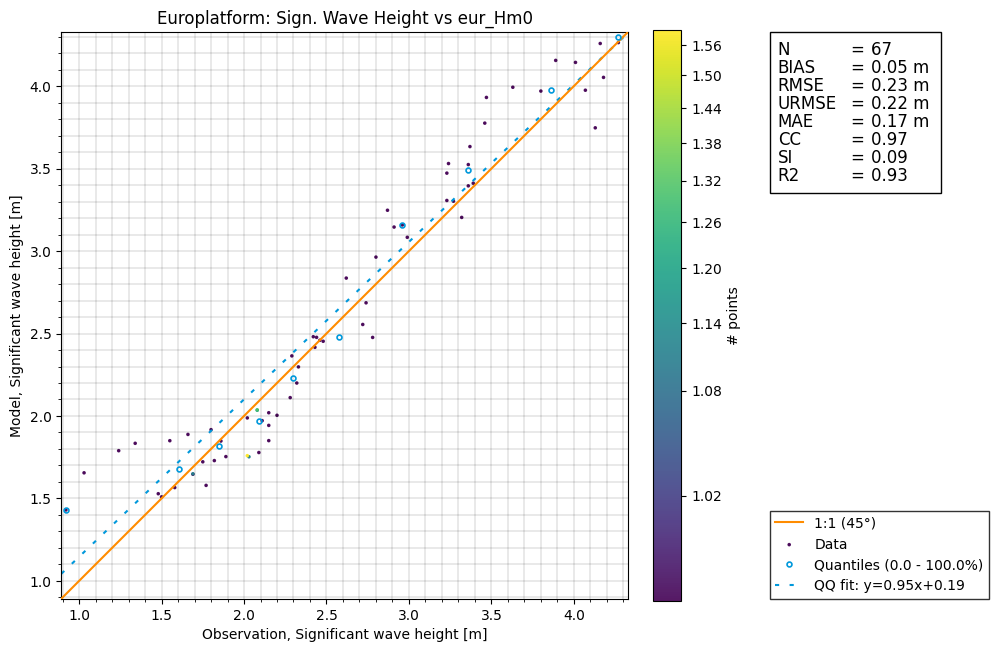

In [10]:
cmp.plot.scatter(fit_to_quantiles=True, show_points=True, skill_table=True, show_density=True);

**Display name of the metrics**:  
Sometimes you like to modify the display name of the metrics. This can be done by passing a dictionary with the metric name as key and the display name as value to the `display_names` parameter.

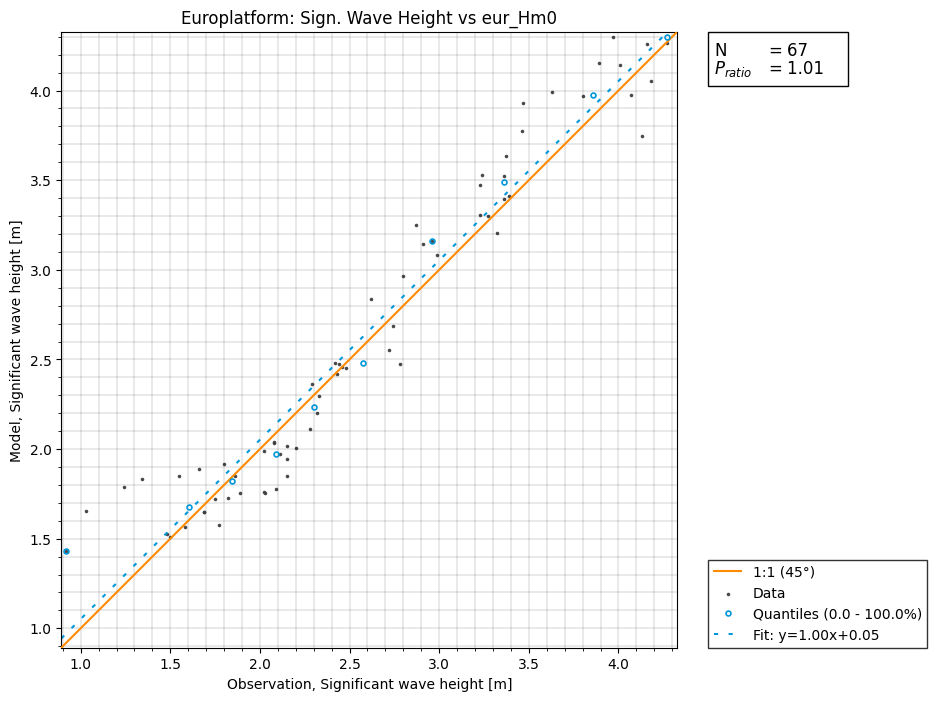

In [11]:
cmp.plot.scatter(skill_table={'$P_{ratio}$':'pr'});

**Formatting the metrics:**  
In this example we modify `bias` to also add the perentage of the bias relative to the mean of the reference series.

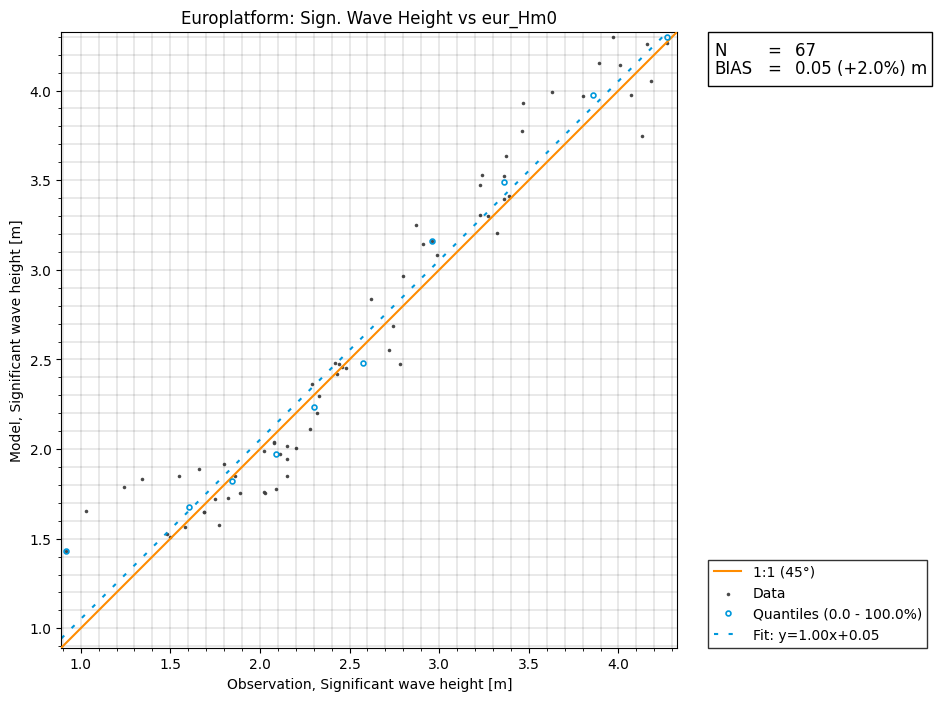

In [12]:
from modelskill.metrics import bias as mybias

def bias(obs, mod):
    avg = obs.mean()
    bias = mybias(obs, mod)
    sign = "+" if bias > 0 else "-"
    return f"{bias:.2f} ({sign}{bias/avg*100:.1f}%)"

cmp.plot.scatter(skill_table=bias);

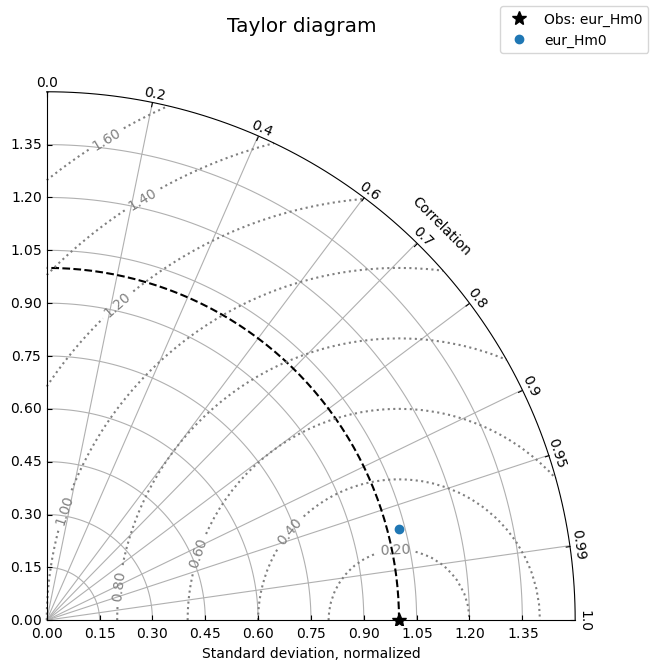

In [13]:
cmp.plot.taylor(normalize_std=True)